In [1]:
import cv2

In [2]:
#read image from /photos directory
img = cv2.imread('../photos/lab3_1.jpg')


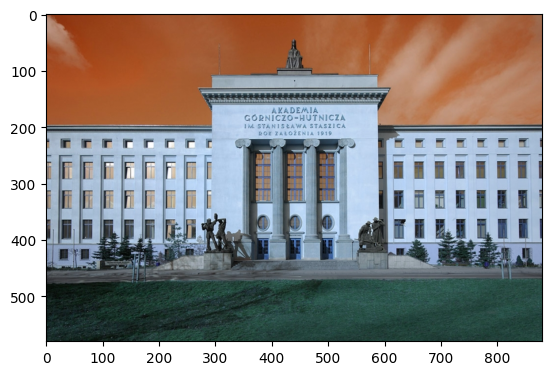

In [3]:
from matplotlib import pyplot
pyplot.imshow(img)

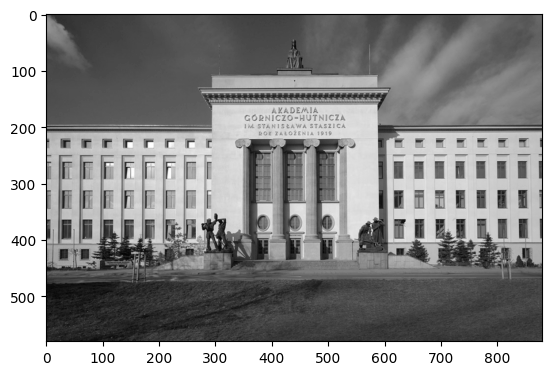

In [4]:
#convert image to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pyplot.imshow(gray, cmap='gray')

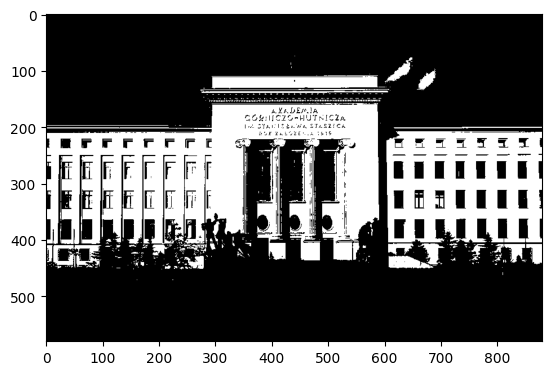

In [5]:
#use cv2.THRESH_BINARY
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
pyplot.imshow(binary, cmap='gray')

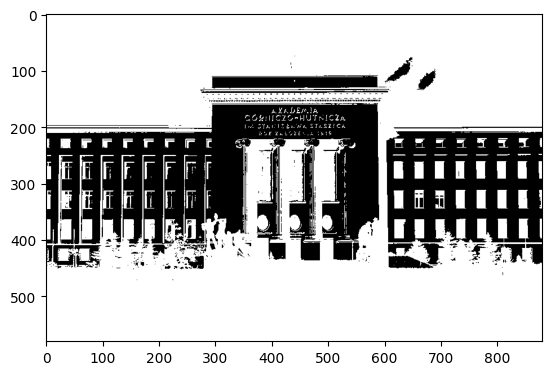

In [6]:
#use cv2.THRESH_BINARY_INV
_, binary_inv = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
pyplot.imshow(binary_inv, cmap='gray')

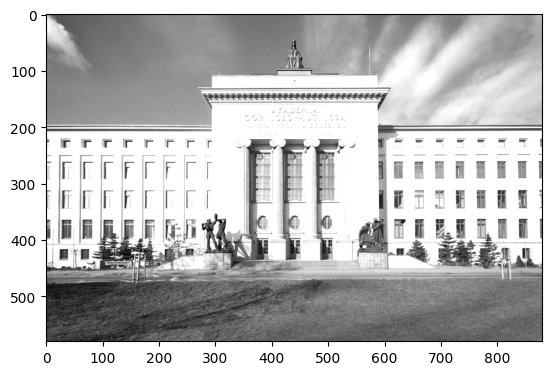

In [7]:
#use cv2.THRESH_TRUNC
_, trunc = cv2.threshold(gray, 150, 255, cv2.THRESH_TRUNC)
pyplot.imshow(trunc, cmap='gray')

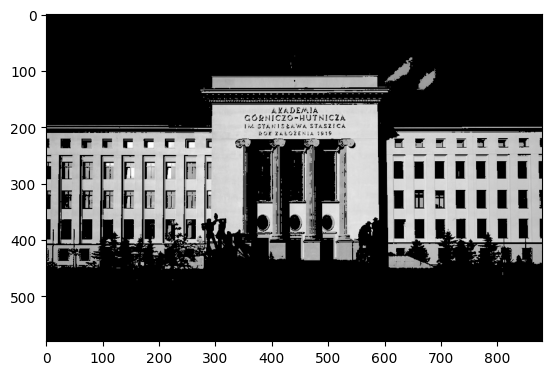

In [8]:
#use cv2.THRESH_TOZERO
_, tozero = cv2.threshold(gray, 150, 255, cv2.THRESH_TOZERO)
pyplot.imshow(tozero, cmap='gray')

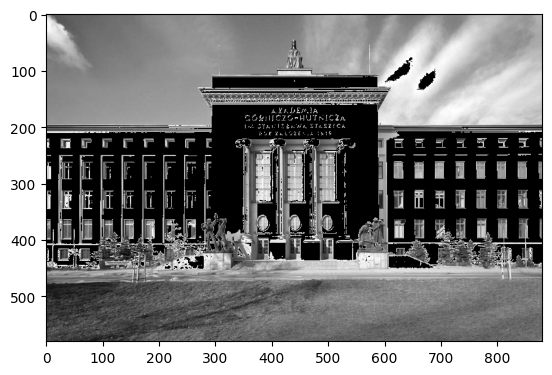

In [9]:
#use cv2.THRESH_TOZERO_INV 
_, tozero_inv = cv2.threshold(gray, 150, 255, cv2.THRESH_TOZERO_INV)
pyplot.imshow(tozero_inv, cmap='gray')

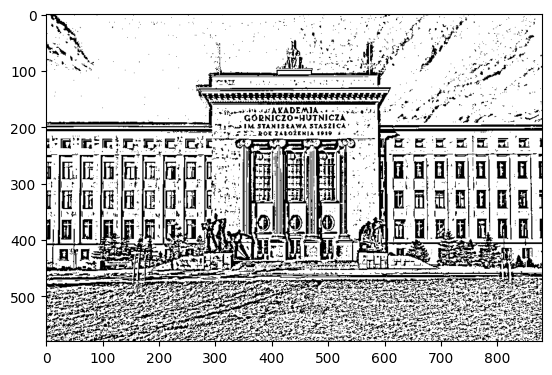

In [10]:
#try adaptive thresholding
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
pyplot.imshow(adaptive, cmap='gray')


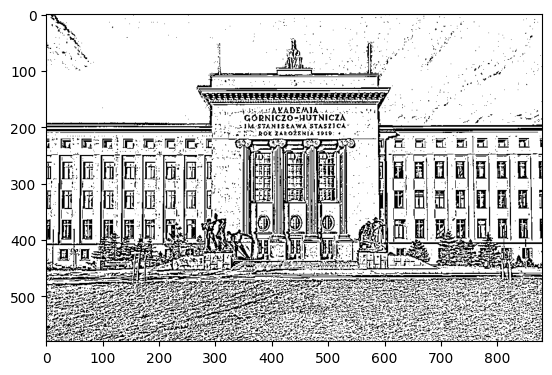

In [11]:
#try adaptive thresholding
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
pyplot.imshow(adaptive_gaussian, cmap='gray')


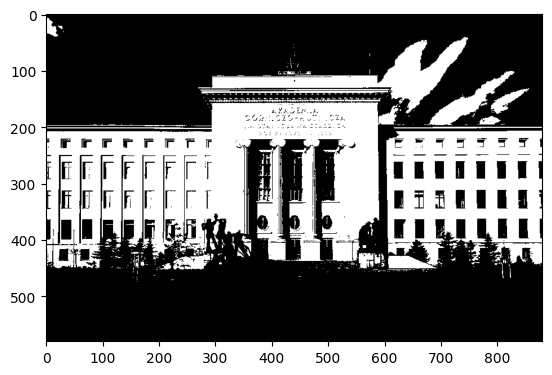

In [12]:
#try otsu thresholding
ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
pyplot.imshow(otsu, cmap='gray')

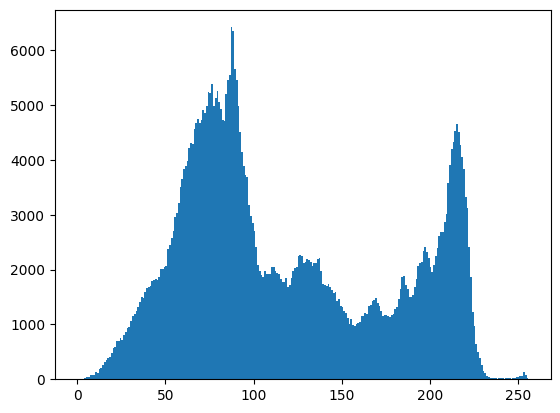

In [13]:
#draw histogram of image with otsu thresholding with ret value
pyplot.hist(gray.ravel(), 256, [0, 256])
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])


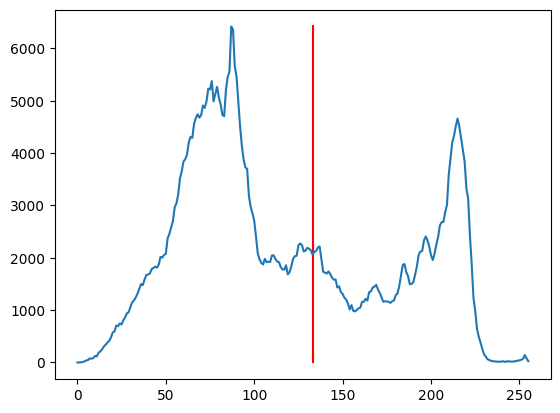

In [14]:
#mark ret value on histogram
pyplot.plot([ret, ret], [0, hist.max()], 'r')
pyplot.plot(hist)

In [15]:
#read second image from /photos directory  
img2 = cv2.imread('../photos/lab3_2.png')


In [16]:
# to rgb
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

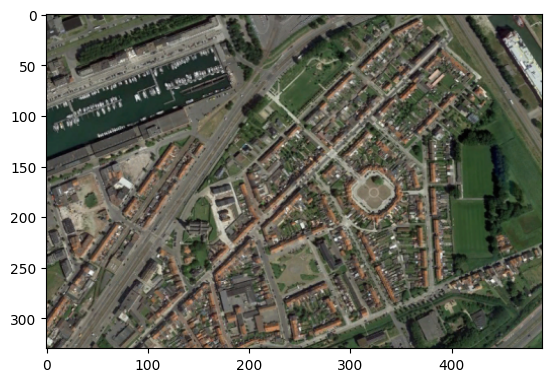

In [17]:
#show image
pyplot.imshow(img2)

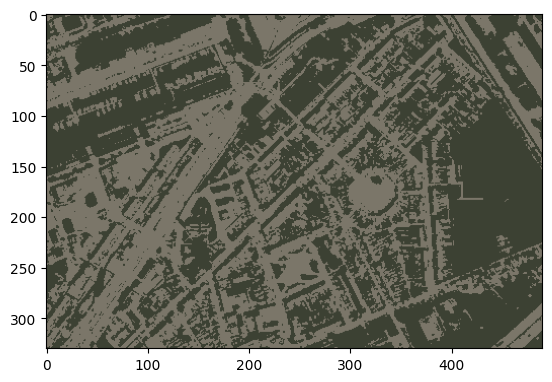

In [20]:
# devide image on segemnts using kmeans algorithm
from sklearn.cluster import KMeans
import numpy as np

#reshape image to 2d array
pixels = img2.reshape(-1, 3)
pixels = np.float32(pixels)

k=2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))
 
pyplot.imshow(segmented_image)

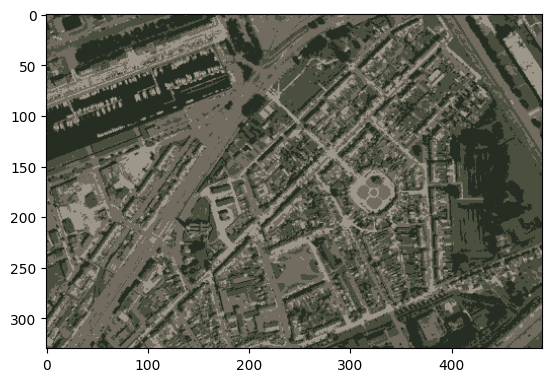

In [21]:
k=4

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))
 
pyplot.imshow(segmented_image)

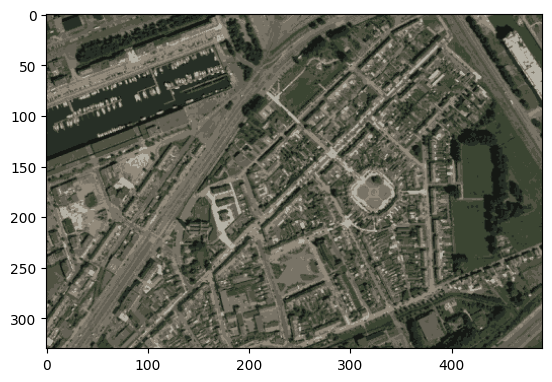

In [23]:
k=8

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))
 
pyplot.imshow(segmented_image)

In [25]:
#self implemented otsu method
def otsu_method(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    q = hist.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist, [i])  # probabilities
        q1, q2 = q[i], q[255] - q[i]  # cum sum of classes
        b1, b2 = np.hsplit(bins, [i])  # weights
        # finding means and variances
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
        # calculates the minimization function
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh




In [26]:
#read image from /photos directory
img = cv2.imread('../photos/lab3_1.jpg')

#convert image to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



/var/folders/qh/nnlpj2tn2mn2szy4sr8ts77r0000gn/T/ipykernel_13637/975084128.py:14: RuntimeWarning: invalid value encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/var/folders/qh/nnlpj2tn2mn2szy4sr8ts77r0000gn/T/ipykernel_13637/975084128.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/var/folders/qh/nnlpj2tn2mn2szy4sr8ts77r0000gn/T/ipykernel_13637/975084128.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  fn = v1 * q1 + v2 * q2


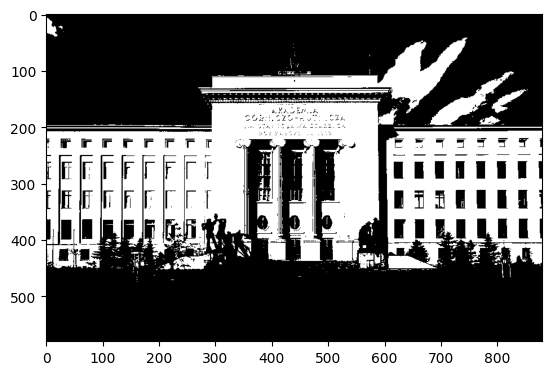

In [27]:
#use self implemented otsu method
ret = otsu_method(gray)
_, otsu = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)
pyplot.imshow(otsu, cmap='gray')



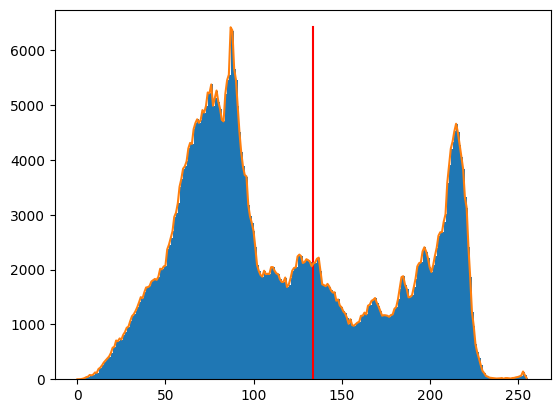

In [28]:
#draw histogram of image with otsu thresholding with ret value
pyplot.hist(gray.ravel(), 256, [0, 256])
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

#mark ret value on histogram
pyplot.plot([ret, ret], [0, hist.max()], 'r')
pyplot.plot(hist)